In [1]:
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_md-2.2.0/en_core_web_md-2.2.0.tar.gz

     |████████████████████████████████| 96.4MB 71kB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.0-cp36-none-any.whl size=98072934 sha256=401da4ce62fac5d75b604fdb988af913cb47ce7551fde1ddf9df488f6bb989a0
  Stored in directory: /root/.cache/pip/wheels/5f/3e/c9/36dd6e13b449fd84cd1f94b72dfbc559daf09f53dbf4e697a3
Successfully built en-core-web-md


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import spacy
from spacy.lang.en import English

from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, GaussianNB, MultinomialNB 
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC

nlp = spacy.load('en_core_web_md', disable=["parser", "ner"])

# Upload your data
To upload your own files for access in Google Colab:

1. Save the file in Google Drive.

2. Once it's saved, find it in your drive, right-click, and click `Get Shareable Link`.

3. Flip the toggle in the pop-up to `Link Sharing On`, then click `Sharing Settings`.

4. In the dropdown menu, choose `Anyone with the link can view`, then click `Copy Link`.

5. Paste that link in the code field below. 

6. Alter the link to the format below. Specifically, the link provided by Google Drive is written by default as:

`https://docs.google.com/document/d/ABCDEFG`

Replace this with:

`https://docs.google.com/uc?export=download&id=ABCDEFG`

Make sure that the unique identifier (`ABCDEFG`) above is identical to what you copied from Google Drive. Once you have saved the file to the Google Colab server, you can now open that file in Python, as in the next cell below.


In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ZuQIDqX1ubW0sGazUwLW0joqU5cFfngg' -O training_set.csv

--2020-03-06 01:54:21--  https://docs.google.com/uc?export=download&id=1ZuQIDqX1ubW0sGazUwLW0joqU5cFfngg
Resolving docs.google.com (docs.google.com)... 74.125.197.100, 74.125.197.139, 74.125.197.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.197.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9euobbb2oqapffuoir7omsvube0i8flr/1583459625000/03716306103365085130/*/1ZuQIDqX1ubW0sGazUwLW0joqU5cFfngg?e=download [following]
--2020-03-06 01:54:21--  https://doc-0g-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9euobbb2oqapffuoir7omsvube0i8flr/1583459625000/03716306103365085130/*/1ZuQIDqX1ubW0sGazUwLW0joqU5cFfngg?e=download
Resolving doc-0g-8k-docs.googleusercontent.com (doc-0g-8k-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0g-8k-docs.googleusercontent.com (doc-0g-8k-d

# Homework 5 (Due March 6, 2020)

Last week you annotated a set of at least 200 microblog posts (your Training Set) with a supervised learning task designed by you and your partner, with your own annotation manual. 

By now, you should have two columns of labels for each post, and you should know the approximate upper bound of machine learning performance on this data, equal to your inter-rater reliability.

Save your work to a CSV file with the two annotator's labels (name the columns `labels_A` and `labels_B`), and a third column with the original text of the annotated post. 

# Task 1
Divide your data into a training set and a test set made up of 20% of the data. If you have 200 rows, your training set should have 160 examples, and your test set should have 40 rows.

In [0]:
input_file = pd.read_csv("training_set.csv")

# pre-process dataframe
input_file.drop(columns=['Unnamed: 0','topic','Unnamed: 5','Unnamed: 6'],inplace=True)
input_file.rename(columns={'label_Zhao':'labels_A','label_Song':'labels_B'},inplace=True)

# select sample
test_set = input_file.sample(40)
training_set = input_file.drop(test_set.index)

# reset index
test_set = test_set.reset_index().drop(columns=['index'])
training_set = training_set.reset_index().drop(columns=['index'])

In [4]:
training_set

,text,labels_B,labels_A
0,@tehseenp I just can't believe ppl like you ex...,2,2
1,Why am I just now hearing J Cole and Kendrick ...,1,1
2,"Murray with another huge 1st down run, 26 yds",1,1
3,Lemme see if Kendrick Lamar can become the 2nd...,1,1
4,Very surprised Tom Brady was willing to speak ...,1,1
...,...,...,...
155,best part about Italy getting back the 4th spo...,1,1
156,"Gorzelanny finishes the AB, walks Schwarber. 2...",3,3
157,Last Friday Night by Katy Perry is #nowplaying...,1,1
158,@mobeenakhan I think you may be confusing @ijc...,2,2


# Task 2

Use 10-fold cross-validation on your training set. Each fold should contain 8% of the original training data (if you had 200 rows originally and use an 80% training set, each fold for optimization will contain 16 examples). 

Optimize a machine learning classifier predicting `labels_A`, using features you extract from the microblog texts. 

Choose and perform **THREE** of the following optimizations:

   - Compare Naïve Bayes, Logistic Regression, and SVMs on a unigram feature space.
   - Compare a unigram feature space with a feature space that also includes longer N-grams.
   - Compare a unigram feature space with a feature space that removes stopwords.
   - Vary the vocabulary size of your n-gram feature space and evaluate how performance changes.
   - If you are working with English data, additional options include:
      - Compare an n-gram feature space with a feature space that also includes part-of-speech n-grams.
      - Compare an n-gram feature space to a word embedding feature space.
      - Compare a standard n-gram feature space with a lemmatized feature space.
   - For the one most accurate model so far, tune your hyperparameters.
       - For Naive Bayes, evaluate different implementations: ComplementNB, MultinomialNB, BernoulliNB
       - For Support Vector Machines, evaluate different kernels including a polynomial kernel and a radial basis function kernel.
       - For Logistic Regression, try L1 and L2 regularization, as well as unregularized features.

Report the performance of your best-tuned model on the cross-validated training set.


## 2.0 Initialize & Pre-porcessing

### define modeling function

In [0]:
def k_folds_model(dataset, x_columns, y_column, classifiers, metrics, kf_num, matrix_labels, cmatrix_show = True):
  
  # use dataframe to store outcomes
  records = []

  for classifier_name, classifier in classifiers.items():

    X = dataset.loc[:, x_columns]
    X = pd.get_dummies(X)
    y = dataset[y_column]
    kf = KFold(n_splits=kf_num, shuffle=True)

    for fold_num, (train_index, test_index) in enumerate(kf.split(X, y)):

      fold_record = {'Classifier':classifier_name,
                     'Fold_num': fold_num}

      X_train = X.iloc[train_index]
      X_test = X.iloc[test_index]
      y_train = y.iloc[train_index]
      y_test = y.iloc[test_index]

      # train the model
      model = classifier.fit(X_train, y_train)
      y_pred = model.predict(X_test)

      # calculate the metrics
      for (metric_name, metric) in metrics.items():
        result = metric(y_test, y_pred)
        fold_record[metric_name] = result
      
      # plot confusion matrix if needed
      if cmatrix_show:
        conf_matrix = confusion_matrix(y_test, y_pred)
        ConfusionMatrixDisplay(conf_matrix, matrix_labels).plot(values_format='.4g',)
        plt.show()

      records.append(fold_record)

    records_df = pd.DataFrame(records)
  
  return records_df

### build bag-of-words df

In [0]:
def ngrams(df, text_column, old_label, new_label, vocab_size = 1000, max_n=1, stop_words = None, lowercase=True):
  vectorizer = CountVectorizer(max_features=vocab_size, ngram_range=(1,max_n), stop_words = stop_words, lowercase=lowercase)
  X = vectorizer.fit_transform(df[text_column])

  df_bow = pd.DataFrame(X.toarray())
  column_names = [str(i) for i in range(vocab_size)]

  for k, v in vectorizer.vocabulary_.items():
    column_names[v] = k
  df_bow.columns = column_names
  df_bow[new_label] = df[old_label].values
  return df_bow

### build embedding df

In [0]:
dimensions = 300

X_dict = {
    f"D{i}":[] for i in range(dimensions)
}

text = training_set['text'].apply(nlp)
for row in text:
    vector = row.vector
    for i in range(len(vector)):
        key = f"D{i}"
        X_dict[key].append(vector[i])

training_embedding_df = pd.DataFrame(X_dict)
training_embedding_df['sentiment'] = training_set['labels_A']
# training_embedding_df

## 2.1 Compare Classifiers

In [8]:
# train models of the following classifier using bag-of-words df
unigram_training_bow = ngrams(training_set, 'text',"labels_A", "sentiment", vocab_size = 1000, max_n=1)

classifiers_bow = {
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", random_state=123),
    "Bernoulli NB": BernoulliNB(),
    "Complement NB": ComplementNB(), 
    "Multinomial NB": MultinomialNB(),
    "Logistic Regression": LogisticRegression(penalty="none", solver="lbfgs", multi_class='ovr', max_iter=10000, random_state=123)
}

metrics = {
    "Accuracy" : lambda y_test,y_pred: 100*accuracy_score(y_test,y_pred),
    "Kappa"    : cohen_kappa_score
}

matrix_labels = ["Positive", "Negative", "Neutral"]
x_columns = list(unigram_training_bow.columns[:-1])

classifier_comparison_df_1 = k_folds_model(unigram_training_bow, x_columns, 'sentiment', classifiers_bow, metrics, 10, matrix_labels, False)


# train models of the following classifier using word embedding df
classifiers_we = {
    "Linear SVM": LinearSVC(),
    "RBF SVM": SVC(kernel='rbf'),
    "Poly SVM": SVC(kernel='poly')
}
classifier_comparison_df_2 = k_folds_model(training_embedding_df, X_dict.keys(), 'sentiment', classifiers_we, metrics, 10, matrix_labels, False)


# compare the performance of all classifiers
classifier_comparison_df = pd.concat([classifier_comparison_df_1,classifier_comparison_df_2])
classifier_average = classifier_comparison_df.groupby('Classifier')['Accuracy','Kappa'].mean()
classifier_average.sort_values(by=['Kappa'], ascending=False,inplace=True)
classifier_average

,Accuracy,Kappa
Classifier,,
Linear SVM,67.500,0.333663
Multinomial NB,59.375,0.231488
Complement NB,55.625,0.196368
Logistic Regression,57.500,0.157820
Poly SVM,62.500,0.109637
RBF SVM,60.625,0.022330
Bernoulli NB,60.000,0.000000
Decision Tree,46.250,-0.003157


For this task, I'm testing the models' performance using different classifiers such as Naïve Bayes, Logistic Regression, and SVMs on a unigram feature space. Given above results of Accuracy and Kappa, linear support vector machine performed the best at 67.5% of accuracy and 0.42 kappa score (the actual value floats every time between 0.28 to 0.42) using word embedding dataframe. The accuracy scores range from 46.9% (Decision Tree) to 67.5% (Linear SVM) and the kappa scores range from almost 0 (Bernoulli NB and decision tree) to 0.42. Thus, the selection of classifiers matters significantly to the performance of models.

## 2.2 Longer N-grams

In [9]:
ngrams_results = pd.DataFrame()

# try unigram, bigram and trigram
for i in range(1,4):
  ngrams_bow = ngrams(training_set, 'text',"labels_A", "sentiment", vocab_size=1000, max_n=i)
  columns = list(ngrams_bow.columns[:-1])
  ngrams_result = k_folds_model(ngrams_bow, columns, 'sentiment', classifiers_bow, metrics, 10, matrix_labels, False)
  ngrams_result['ngram'] = i

  # put the results together
  ngrams_results = pd.concat([ngrams_results,ngrams_result])


# calculate the average metrics of different ngram classifiers
ngrams_average = ngrams_results.groupby(['Classifier','ngram'])['Accuracy','Kappa'].mean()
ngrams_average.sort_values(by=['Kappa'], ascending=False,inplace=True)
ngrams_average.head(10)

Accuracy     Kappa
Classifier          ngram                    
Multinomial NB      2        63.125  0.279732
                    3        57.500  0.205066
Complement NB       2        54.375  0.200868
                    3        51.875  0.195237
Logistic Regression 3        58.750  0.193059
Multinomial NB      1        59.375  0.188737
Logistic Regression 2        57.500  0.179497
Complement NB       1        54.375  0.175202
Logistic Regression 1        60.625  0.156164
Decision Tree       3        48.750  0.078245

While the vocabulary sizes of ngram space stay the same, the models on trigram and bigram space perform better than on unigram. The Kappa scores of multinomial NB, complement NB and logistic regression are both raised by about 0.1 from unigram to trigram. The ngrams spaces does not influence the performance of decision tree much though. The best performing model for n-grams optimization is multinomial NB on trigram space.

## 2.3 Remove stopwords

In [10]:
# unigram
unigram_bow = ngrams(training_set, 'text',"labels_A", "sentiment", vocab_size=1000)
columns = list(unigram_bow.columns[:-1])
unigram_result = k_folds_model(unigram_bow, columns, 'sentiment', classifiers_bow, metrics, 10, matrix_labels, False)

# remove stopwords
stop_words_bow = ngrams(training_set, 'text',"labels_A", "sentiment", vocab_size=1000, stop_words='english')
columns = list(stop_words_bow.columns[:-1])
stop_words_result = k_folds_model(stop_words_bow, columns, 'sentiment', classifiers_bow, metrics, 10, matrix_labels, False)
stop_words_result['sw_removed'] = 1

# try case sensitive
case_sensitive_bow = ngrams(training_set, 'text',"labels_A", "sentiment", vocab_size=1000, lowercase=False)
columns = list(case_sensitive_bow.columns[:-1])
case_sensitive_result = k_folds_model(case_sensitive_bow, columns, 'sentiment', classifiers_bow, metrics, 10, matrix_labels, False)
case_sensitive_result['case_sensitive'] = 1


# get the average metrics of model with different optimization options
stop_lower_results = pd.concat([unigram_result,stop_words_result,case_sensitive_result],sort=True)
stop_lower_results.fillna(0, inplace=True)
stop_lower_results['case_sensitive'] = stop_lower_results['case_sensitive'].astype(int)
stop_lower_results['sw_removed'] = stop_lower_results['sw_removed'].astype(int)
stop_lower_average = stop_lower_results.groupby(['Classifier','case_sensitive','sw_removed'])['Accuracy','Kappa'].mean()
stop_lower_average.sort_values(by=['Kappa'], ascending=False,inplace=True)
stop_lower_average.head(10)

,,,Accuracy,Kappa
Classifier,case_sensitive,sw_removed,,
Logistic Regression,0,0,61.250,0.220118
Complement NB,1,0,52.500,0.192915
Multinomial NB,0,0,60.000,0.180731
Logistic Regression,1,0,57.500,0.175668
Complement NB,0,1,41.250,0.119576
Multinomial NB,1,0,55.625,0.119137
Complement NB,0,0,53.750,0.113953
Multinomial NB,0,1,47.500,0.112451
Logistic Regression,0,1,56.250,0.075460


Given the results, removing stop words does not necessarily lead to improvents in the models' performance. The best model on the unigram space is still the one using multinomial NB s classifier with stopwords and case insensitivity. For logistic regrssion model, being case sensitive raises the Kappa score by 0.018. Other than that, removing stop words and turning into case sensitive did not help with the optimization.

## 2.4 Vocabulary size

In [11]:
ngrams_results = pd.DataFrame()

# try unigram, bigram and trigram
for i in range(1,4):
  if i == 1:
    vocab_list = [500,1000]
  elif i == 2:
    vocab_list = [500,1000,1270]
  else:
    vocab_list = [500,1000,1270,3809]

  for vocab_size in vocab_list:
    ngrams_bow = ngrams(training_set, 'text',"labels_A", "sentiment", vocab_size, max_n=i)
    columns = list(ngrams_bow.columns[:-1])
    ngrams_result = k_folds_model(ngrams_bow, columns, 'sentiment', classifiers_bow, metrics, 10, matrix_labels, False)
    ngrams_result['ngram'] = i
    ngrams_result['vocab_size'] = vocab_size

    # put the results together
    ngrams_results = pd.concat([ngrams_results,ngrams_result])


# calculate the average metrics of different ngram classifiers
ngrams_average = ngrams_results.groupby(['Classifier','ngram','vocab_size'])['Accuracy','Kappa'].mean()
ngrams_average.sort_values(by=['Kappa'], ascending=False,inplace=True)
ngrams_average.head(10)

Accuracy     Kappa
Classifier          ngram vocab_size                    
Multinomial NB      2     500           58.750  0.269292
                    3     1270          60.625  0.266461
                          1000          60.000  0.263570
Complement NB       1     500           55.625  0.244101
                    3     1270          53.125  0.229919
                          500           51.250  0.224208
Logistic Regression 3     1270          60.000  0.216849
Multinomial NB      1     1000          60.625  0.212499
Complement NB       1     1000          55.000  0.211875
Multinomial NB      2     1000          58.125  0.210713

The increasing of vacabulary size does not necessarily lead to improvement in models' performance. On the contrary, I found that smaller vocabulary sizes actually work better with multinomial and complement NB on bigram or trigram space. For example, the decrease of vocabulary size from 1270 to 500 raises the kappa score of Complement NB model on binary space by 0.03.

## 2.5 N-grams with part of speech

In [13]:
# build part-of-speech dataframe
training_set_pos = training_set.copy()
training_set_pos["tokenized"] = training_set_pos['text'].apply(lambda x: nlp(x))
training_set_pos['part_of_speech'] = training_set_pos["tokenized"].apply(lambda x: " ".join([token.tag_ for token in x]))
training_set_pos

# train ngram models using part-of-speech input
ngrams_results = pd.DataFrame()
for i in range(1,4):

  ngrams_bow = ngrams(training_set_pos, 'part_of_speech',"labels_A", "sentiment", vocab_size=38, max_n=i)
  columns = list(ngrams_bow.columns[:-1])
  ngrams_result = k_folds_model(ngrams_bow, columns, 'sentiment', classifiers_bow, metrics, 10, matrix_labels, False)
  ngrams_result['ngram'] = i
  ngrams_results = pd.concat([ngrams_results,ngrams_result])

# calculate the average metrics of different ngram classifiers
ngrams_average_p = ngrams_results.groupby(['Classifier','ngram'])['Accuracy','Kappa'].mean()
ngrams_average_p.sort_values(by=['Kappa'], ascending=False,inplace=True)
ngrams_average_p.head(10)

Accuracy     Kappa
Classifier          ngram                    
Bernoulli NB        1        61.250  0.260103
Logistic Regression 3        53.125  0.154134
Bernoulli NB        3        53.125  0.146315
Complement NB       2        43.125  0.131897
                    3        46.250  0.131702
Bernoulli NB        2        50.000  0.122050
Complement NB       1        46.875  0.117765
Logistic Regression 2        50.625  0.115223
Multinomial NB      1        55.000  0.114204
Decision Tree       2        49.375  0.098861

Bernoulli NB models perform the best compared to other classifiers with part-of-speech tags. But averagely, using part-of-speech tags lower the accuracy and kappa score of the models.

## Conclusion
On the ten-fold cross-validated training set, the best performing model of mine is the **`Linear SVM`** model using word embedding dataframe on the unigram space. The model's accuracy is about 67% and the kappa score floats around 0.4.

Among different implementations of Naive Bayes models, the **`Multinomial NB`** and **`Complement NB`** perform their best with small vocabulary size on bigram or trigram spaces with regular text input and without having stopwirds removed or case sensitivity; the **`Bernoulli NB`** works the best and outperform the other two with part-of-speech tags and small vocabulary size on unigram space.

# Task 3

Train two models, each **trained on the full 80% training set, and tested on the held-out 20% test set**:
   - A Naïve Bayes classifier with unigram features.
   - The best-tuned model from task two, retrained on the full 80% training set. 
   
Report three sets of evaluation metrics:
   - The estimated performance from cross-validation in Task 2.
   - The performance of the simple Naïve Bayes unigram classifier on the held-out test set.
   - The performance of the best-tuned model on the held-out test set.

At minimum, your evaluations should include percent accuracy and Kappa values.

## 3.0 Preprocessing

### redefine modeling function

In [0]:
def held_out_test(train_set, test_set, train_x, test_x, label_column, classifiers, metrics, matrix_labels, cmatrix_show = True):

  for classifier_name, classifier in classifiers.items():
    print(f"{classifier_name}")
    X_train = train_set.loc[:, train_x]
    X_test = test_set.loc[:, test_x]
    y_train = train_set[label_column]
    y_test = test_set[label_column]

    # train the model
    model = classifier.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # calculate the metrics
    for (metric_name, metric) in metrics.items():
      result = metric(y_test, y_pred)
      print(f"{metric_name}: {result}")
    
    # plot confusion matrix if needed
    if cmatrix_show:
      conf_matrix = confusion_matrix(y_test, y_pred)
      ConfusionMatrixDisplay(conf_matrix, matrix_labels).plot(values_format='.4g',)
      plt.show()
    print('-'*50)

### define word embedding df function

In [0]:
def we_df(dataset, text_column, old_label, new_label):
  dimensions = 300

  X_dict = {
      f"D{i}":[] for i in range(dimensions)
  }

  text = dataset[text_column].apply(nlp)
  for row in text:
      vector = row.vector
      for i in range(len(vector)):
          key = f"D{i}"
          X_dict[key].append(vector[i])

  df = pd.DataFrame(X_dict)
  df[new_label] = dataset[old_label]
  return df, X_dict.keys()

## 3.1 Naive Bayes (bag-of-words)

Bernoulli NB
Accuracy: 32.5
Kappa: -0.052631578947368585
Micro-Average F-Score: 0.325


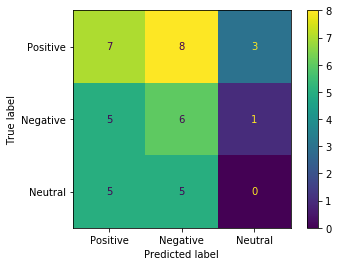

--------------------------------------------------
Complement NB
Accuracy: 22.5
Kappa: -0.13970588235294112
Micro-Average F-Score: 0.225


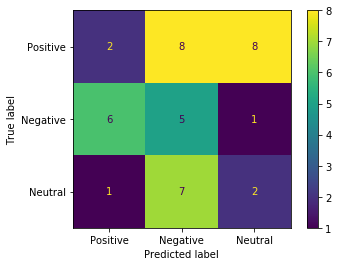

--------------------------------------------------
Multinomial NB
Accuracy: 20.0
Kappa: -0.15107913669064743
Micro-Average F-Score: 0.20000000000000004


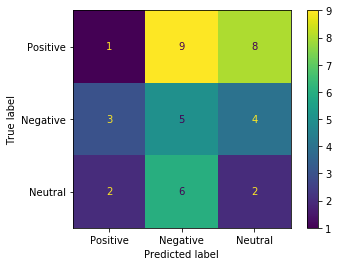

--------------------------------------------------


In [16]:
# create bag-of-words df
train_set_bow = ngrams(training_set, 'text',"labels_A", "sentiment", vocab_size=441, max_n=1)
train_columns = list(train_set_bow.columns[:-1])
test_set_bow = ngrams(test_set, 'text',"labels_A", "sentiment", vocab_size=441, max_n=1)
test_columns = list(test_set_bow.columns[:-1])

# train the naive bayes models
classifiers_nb = {
    "Bernoulli NB": BernoulliNB(),
    "Complement NB": ComplementNB(), 
    "Multinomial NB": MultinomialNB()
}

metrics_more = {
    "Accuracy" : lambda y_test,y_pred: 100*accuracy_score(y_test,y_pred),
    "Kappa"    : cohen_kappa_score,
    "Micro-Average F-Score": lambda y_test,y_pred: f1_score(y_test,y_pred, average="micro")
}

held_out_test(train_set_bow, test_set_bow, train_columns, test_columns, 'sentiment', classifiers_nb, metrics_more, matrix_labels, cmatrix_show = True)

Given the performances of Complement NB and Multinomial NB from cross-validation in Task 2, I estimated that the Kappa score of test set on unigram space would be at least 0.2 and 50% accuracy. But the fact slapped on my face so hard and was too cruel for me to accept with ease... The kappa score of the best implementation of Naive Bayes in this case, Bernoulli NB, is only 0.06 with 35% of accuracy. And the kappa of Complement NB is even negative with 30% accuracy, not even as good as random guess...

The problem may lie with the size of the data which is clearly not big enough for Naive Bayes algorithm to capture patterns with consistency. But, still, I wonder why with extreme small sizes of data (only 16) in 10-fold cross-validation, the result is better than the held out test model. The relationship between data size and model performance may not be pure linear.

## 3.2 Best-tuned: Linear SVM (word embedding)

Linear SVM
Accuracy: 55.00000000000001
Kappa: 0.26530612244897955
Micro-Average F-Score: 0.55


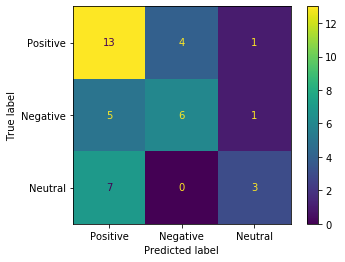

--------------------------------------------------


In [17]:
# create word embedding dataframes
train_set_we, train_we_columns = we_df(training_set, 'text', 'labels_A', 'sentiment')
test_set_we, test_we_columns = we_df(test_set, 'text', 'labels_A', 'sentiment')

best_classifier = {
    "Linear SVM": LinearSVC()
}

held_out_test(train_set_we, test_set_we, train_we_columns, test_we_columns, 'sentiment', best_classifier, metrics_more, matrix_labels, cmatrix_show = True)

I estimated the results of Linear SVM to be around 60% of accuracy and at least 0.35 kappa. The 60% accuracy of the actual model aligned with my estimation, while the kappa score is only about 0.17. Although the results is not as good as expected, the Linear SVM model still outperformed Naive Bayes model by 0.16 kappa score.

## 3.3 Extra: labels_B

In [0]:
# get unigram bag-of-word and word-embedding dataframes
unigram_training_bow_b = ngrams(training_set, 'text',"labels_B", "sentiment", vocab_size = 1000, max_n=1)
train_set_we_b, train_we_columns_b = we_df(training_set, 'text', 'labels_B', 'sentiment')

from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

# define t-test function
def p_value(results_a,results_b):
  diff = False
  stat, p = ttest_ind(results_a,results_b)
  if p < 0.05:
    diff = True
  print(f"Significantly different? {diff}, p={p:.5f}")

#### 3.3.1 Compare classifiers

In [19]:
# re-use the code from Task2.1
x_columns = list(unigram_training_bow_b.columns[:-1])
classifier_comparison_b_1 = k_folds_model(unigram_training_bow_b, x_columns, 'sentiment', classifiers_bow, metrics, 10, matrix_labels, False)
classifier_comparison_b_2 = k_folds_model(train_set_we_b, train_we_columns_b, 'sentiment', classifiers_we, metrics, 10, matrix_labels, False)
classifier_comparison_b = pd.concat([classifier_comparison_b_1,classifier_comparison_b_2])
classifier_average_b = classifier_comparison_b.groupby('Classifier')['Accuracy','Kappa'].mean()

# join the A classifier outcome table and B
a_b_compare = classifier_average.merge(classifier_average_b,on='Classifier',suffixes=('_a','_b'))
a_b_compare.sort_values(by='Kappa_b',ascending=False,inplace=True)
a_b_compare

,Accuracy_a,Kappa_a,Accuracy_b,Kappa_b
Classifier,,,,
Linear SVM,67.500,0.333663,55.625,0.221466
Decision Tree,46.250,-0.003157,50.000,0.135393
Multinomial NB,59.375,0.231488,50.000,0.094020
Complement NB,55.625,0.196368,41.250,0.048803
RBF SVM,60.625,0.022330,55.000,0.000000
Bernoulli NB,60.000,0.000000,54.375,-0.007563
Logistic Regression,57.500,0.157820,43.125,-0.008101
Poly SVM,62.500,0.109637,53.125,-0.010149


In [20]:
p_value(a_b_compare['Kappa_a'],a_b_compare['Kappa_b'])

Significantly different? False, p=0.19307


#### 3.3.2 N-gram and Vocabulary Size

In [21]:
ngrams_results_b = pd.DataFrame()

# try unigram, bigram and trigram
for i in range(1,4):
  if i == 1:
    vocab_list = [500,1000]
  elif i == 2:
    vocab_list = [500,1000,1270]
  else:
    vocab_list = [500,1000,1270,3809]

  for vocab_size in vocab_list:
    ngrams_bow_b = ngrams(training_set, 'text',"labels_B", "sentiment", vocab_size, max_n=i)
    columns = list(ngrams_bow_b.columns[:-1])
    ngrams_result_b = k_folds_model(ngrams_bow_b, columns, 'sentiment', classifiers_bow, metrics, 10, matrix_labels, False)
    ngrams_result_b['ngram'] = i
    ngrams_result_b['vocab_size'] = vocab_size

    # put the results together
    ngrams_results_b = pd.concat([ngrams_results_b,ngrams_result_b])


# calculate the average metrics of different ngram classifiers
ngrams_average_b = ngrams_results_b.groupby(['Classifier','ngram','vocab_size'])['Accuracy','Kappa'].mean()
a_b_ngrams = ngrams_average.merge(ngrams_average_b,on=['Classifier','ngram','vocab_size'],suffixes=('_a','_b'))
a_b_ngrams.sort_values(by='Kappa_b',ascending=False,inplace=True)
a_b_ngrams.head(10)

Accuracy_a   Kappa_a  Accuracy_b   Kappa_b
Classifier     ngram vocab_size                                            
Decision Tree  2     500             40.000 -0.050965      47.500  0.125002
Multinomial NB 2     1000            58.125  0.210713      48.125  0.119467
                     500             58.750  0.269292      46.250  0.115367
Decision Tree  3     3809            46.250  0.063181      49.375  0.113829
Multinomial NB 1     1000            60.625  0.212499      51.875  0.111741
                     500             56.875  0.155808      50.000  0.111639
Decision Tree  3     500             41.250 -0.008244      47.500  0.107365
               2     1270            46.250  0.011217      50.000  0.097303
Complement NB  3     3809            38.750  0.113954      38.750  0.087853
Decision Tree  2     1000            43.125 -0.017379      45.000  0.084027

In [22]:
p_value(a_b_ngrams['Kappa_a'],a_b_ngrams['Kappa_b'])

Significantly different? True, p=0.00000


#### 3.3.3 N-gram Part of Speech

In [24]:
ngrams_results = pd.DataFrame()
for i in range(1,4):

  ngrams_bow = ngrams(training_set_pos, 'part_of_speech',"labels_A", "sentiment", vocab_size=38, max_n=i)
  columns = list(ngrams_bow.columns[:-1])
  ngrams_result = k_folds_model(ngrams_bow, columns, 'sentiment', classifiers_bow, metrics, 10, matrix_labels, False)
  ngrams_result['ngram'] = i
  ngrams_results = pd.concat([ngrams_results,ngrams_result],sort=True)

ngrams_average_p_b = ngrams_results.groupby(['Classifier','ngram'])['Accuracy','Kappa'].mean()
a_b_pos = ngrams_average_p.merge(ngrams_average_p_b,on=['Classifier','ngram'],suffixes=('_a','_b'))
a_b_pos.sort_values(by='Kappa_b',ascending=False,inplace=True)
a_b_pos.head(10)

Accuracy_a   Kappa_a  Accuracy_b   Kappa_b
Classifier          ngram                                            
Bernoulli NB        1          61.250  0.260103      58.125  0.203512
                    3          53.125  0.146315      53.750  0.171828
Logistic Regression 2          50.625  0.115223      53.125  0.152480
Complement NB       2          43.125  0.131897      43.750  0.128225
                    1          46.875  0.117765      46.875  0.126904
Multinomial NB      2          48.750  0.069488      50.000  0.123656
Logistic Regression 1          48.125  0.020182      52.500  0.123407
Complement NB       3          46.250  0.131702      45.000  0.122912
Decision Tree       3          44.375 -0.010780      51.875  0.119353
Multinomial NB      1          55.000  0.114204      52.500  0.093277

In [25]:
p_value(a_b_pos['Kappa_a'],a_b_pos['Kappa_b'])

Significantly different? False, p=0.79133


#### 3.3.4 Held out test: NB

Bernoulli NB
Accuracy: 35.0
Kappa: -0.009708737864077666
Micro-Average F-Score: 0.35


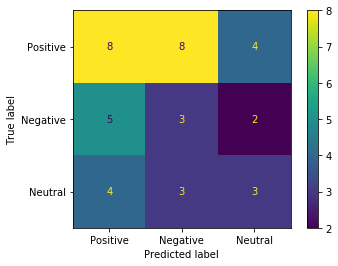

--------------------------------------------------
Complement NB
Accuracy: 25.0
Kappa: -0.09090909090909083
Micro-Average F-Score: 0.25


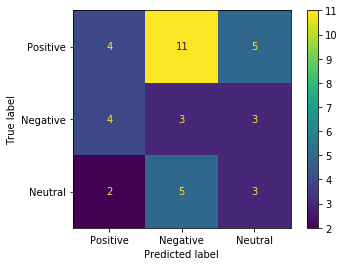

--------------------------------------------------
Multinomial NB
Accuracy: 40.0
Kappa: 0.12727272727272732
Micro-Average F-Score: 0.4000000000000001


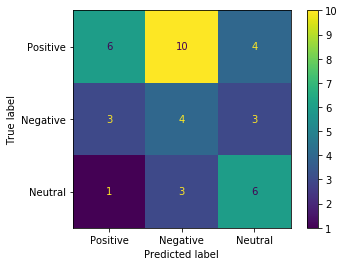

--------------------------------------------------


In [26]:
train_set_bow_b = ngrams(training_set, 'text',"labels_B", "sentiment", vocab_size=441, max_n=1)
train_columns_b = list(train_set_bow_b.columns[:-1])
test_set_bow_b = ngrams(test_set, 'text',"labels_B", "sentiment", vocab_size=441, max_n=1)
test_columns_b = list(test_set_bow_b.columns[:-1])

held_out_test(train_set_bow_b, test_set_bow_b, train_columns_b, test_columns_b, 'sentiment', classifiers_nb, metrics_more, matrix_labels, cmatrix_show = True)

In [27]:
# input kappa score by hand
p_value([0.06391,-0.0438,0.02524],[-0.1545,-0.06073,-0.13565])

Significantly different? True, p=0.03614


#### 3.3.5 Held out test: Best-tuned (Linear SVM)

Linear SVM
Accuracy: 55.00000000000001
Kappa: 0.26530612244897955
Micro-Average F-Score: 0.55


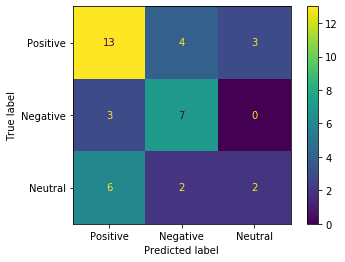

--------------------------------------------------


In [28]:
train_set_we_b, train_we_columns_b = we_df(training_set, 'text', 'labels_B', 'sentiment')
test_set_we_b, test_we_columns_b = we_df(test_set, 'text', 'labels_B', 'sentiment')

held_out_test(train_set_we_b, test_set_we_b, train_we_columns_b, test_we_columns_b, 'sentiment', best_classifier, metrics_more, matrix_labels, cmatrix_show = True)

In [29]:
# input kappa score by hand
p_value(0.1677503250975293, 0.23444976076555024)

Significantly different? False, p=nan


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


#### 3.3.6 Conclusion
Among my tests between labels_A and labels_B, the results showed statistic significance for models with varying length of n-grams and vocabulary size with p-value being 0.002 rejecting the null hypothesis of no difference. For the B labels, the classifier of Decision Tree performed surprisingly and significantly well on bigram and trigram spaces with small vocabulary size compared to A labels. Other than that, the 10-fold model quality metrics didn't show significant difference between models trained with labels_A or labels_B.

With held-out test set, however, labels_A Naive Bayes models performed significantl better than labels_B models with 0.03614 p-value; labels_B best-tuned Linear SVM models outperformed labels_A's while the data size was not big enough to conduct t-test.

# Extra Credit

For up to 3 points of extra credit:
   - Perform five of the optimizations above instead of three.

For up to 3 points of extra credit:
   - Re-run the same set of code above but on `labels_B` instead of `labels_A`. Choose a new set of optimized hyperparameters and features based on these results. How do the chosen models differ, and are the model quality metrics different between the two columns in a statistically significant way?


# Scoring Rubric
![](https://drive.google.com/uc?export=view&id=1JqI8Tfmi3YrnjVdDxjwNu1ZOuOOgQCuI)

![](https://drive.google.com/uc?export=view&id=1VfVuKGmNBu6oJgXBTX4YB6Lxe_0t9cWN)